In [21]:
import matplotlib.pyplot as plt # 导入图形库
import numpy as np
from scipy.integrate import odeint # 一阶常微分方程组的数值程序
%matplotlib inline

n = 50000

# FFT 算法

## 快速傅里叶变换 FFT


FFT 是数值离散傅里叶变换的快速算法。具体介绍，可以参考知乎的相关文章。


在 `Numpy` 中，由子程序 `fft` 完成，其中 `rfft` 是对实数序列进行傅里叶分析。具体参考[说明](https://docs.scipy.org/doc/numpy/reference/routines.fft.html)。

`rfft` 的输出是一个一维向量，输出对应傅里叶模式的振幅。

`fftfreq` 输出对应的频率。


关于圆频率，有下列重要参数：

- 最小圆频率是 0


- 最大圆频率是 $\frac{\pi}{\Delta t}$,$\Delta t$ 是相邻采样点的时间间隔


- 分辨率：圆频率间隔是 $\frac{2 \pi}{t_{total}}$,$t_{total} = n \Delta t$ 是样本总时长，$n$ 是采用点数。


- $\omega_i = i \frac{2 \pi}{n \Delta t}$, 若 $n$ 是偶数 $i = 0,1,2,...,n/2$ ; 若 $n$ 是奇数 $i = 0,1,2,...,(n+1)/2$.

# $sin$ 函数

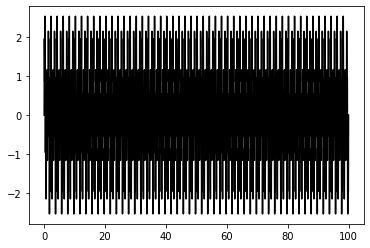

In [105]:
t = np.linspace(0,100,n)
A = np.sin(2*np.pi*t)+np.sin(3*np.pi*t)+np.sin(9*np.pi*t)
plt.plot(t,A,'k-')

6.283185199999999 9.4247778 28.274333399999996


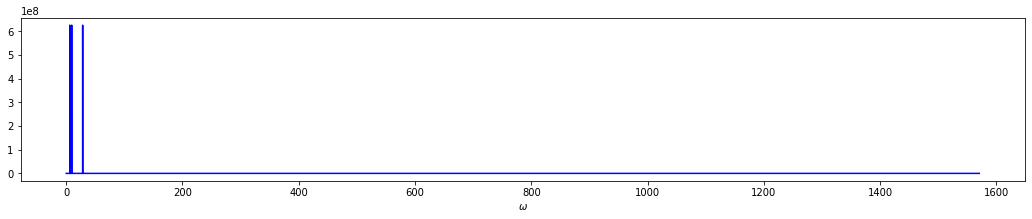

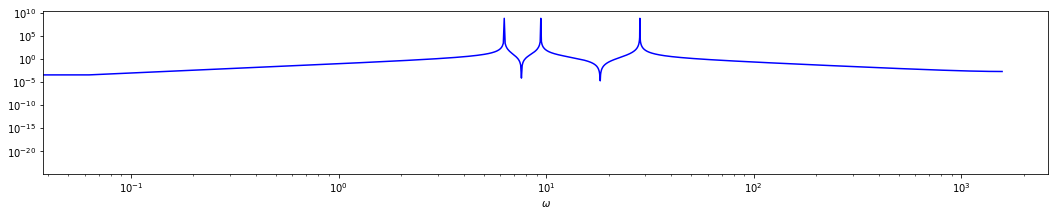

In [109]:
t_delta = 100/n
Omega_Max = 3.1415926/t_delta

xf= np.fft.rfft(A)

Omega = np.linspace(0, Omega_Max, len(A)/2+1)
xfp = np.abs(xf**2)

# print("Omega is:",Omega[np.argmax(xfp)])

print(Omega[np.argsort(xfp)[-1]],Omega[np.argsort(xfp)[-2]],Omega[np.argsort(xfp)[-3]])

plt.figure(figsize=(18,3))
#plt.xlim([0,30])
#plt.ylim([-42,2])
plt.plot(Omega, xfp,"b-")
plt.xlabel(r'$ω$');

plt.figure(figsize=(18,3))
#plt.xlim([0,30])
#plt.ylim([-42,2])
plt.loglog(Omega, xfp,"b-")
plt.xlabel(r'$ω$');

# 随机过程

## 扔硬币

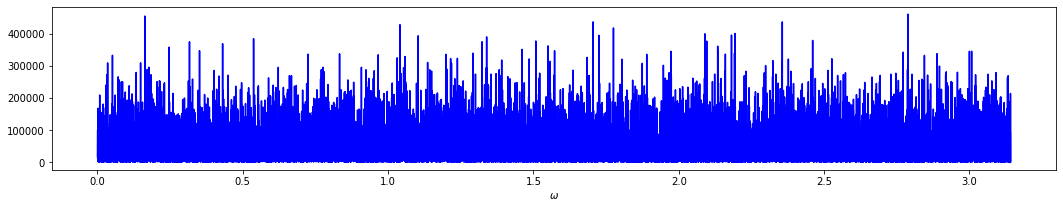

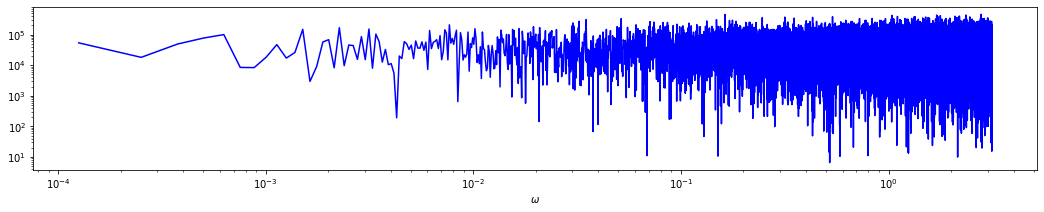

In [110]:
A=np.random.choice([-1,1],size=n)
# A = np.random.uniform(-1,1,size=n)

t_delta = 1
Omega_Max = 3.1415926/t_delta

xf= np.fft.rfft(A)

Omega = np.linspace(0, Omega_Max, len(A)/2+1)

xfp = np.abs(xf**2)

plt.figure(figsize=(18,3))
#plt.xlim([0,2])
#plt.ylim([-42,2])
plt.plot(Omega, xfp,"b-")
plt.xlabel(r'$ω$');


plt.figure(figsize=(18,3))
#plt.xlim([0,2])
#plt.ylim([-42,2])
plt.loglog(Omega[1:], xfp[1:],"b-")
plt.xlabel(r'$ω$');




##  随机行走

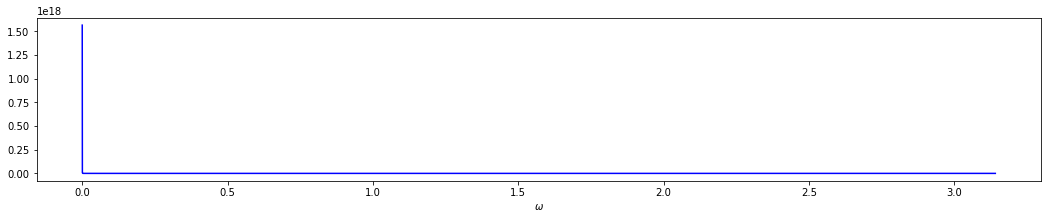

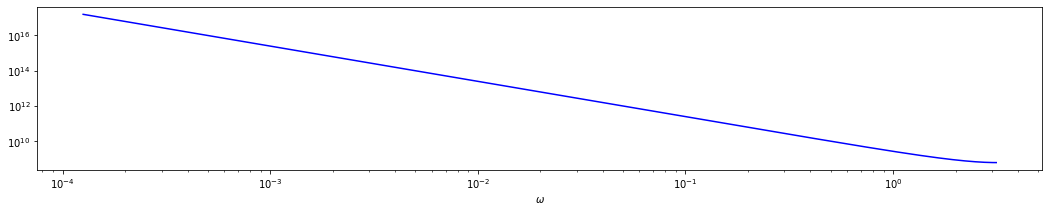

In [81]:

x=0
for i in np.arange(n):
    x += np.random.uniform(1)
    A[i] = x
    

t_delta = 1
Omega_Max = 3.1415926/t_delta

xf= np.fft.rfft(A)

Omega = np.linspace(0, Omega_Max, len(A)/2+1)
xfp = np.abs(xf**2)

plt.figure(figsize=(18,3))
#plt.xlim([0,2])
#plt.ylim([-42,2])
plt.plot(Omega, xfp,"b-")
plt.xlabel(r'$ω$');

plt.figure(figsize=(18,3))
#plt.xlim([0,2])
#plt.ylim([-42,2])
plt.loglog(Omega[1:], xfp[1:],"b-")
plt.xlabel(r'$ω$');

## Logistic Map

In [123]:
def LogisticMapFunction(x,r): # 定义 logistic map
    return r*x*(1-x)

def LogisticMapDynamics(x,r,n): # x0,x1,x2,...,xn
    X = []
    Y = []
    for i in np.arange(0,n):
        X.append(i)
        Y.append(x)
        x = LogisticMapFunction(x,r)
    return np.array(X),np.array(Y)
r=3.5699457
# 2.8-1
# 3.3 -2
# 3.5 - 4
#  3.82843 -3
# 3.55 -8
# 3.567 -16
# 3.5688 -32
# 3.569945672
_,a = LogisticMapDynamics(0.5,r,5000)
_,A = LogisticMapDynamics(a[-1],r,n)

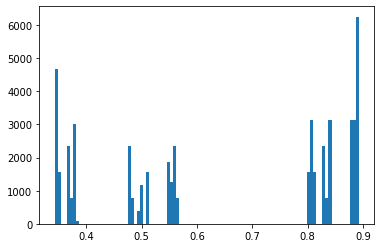

In [124]:
plt.hist(A,100);

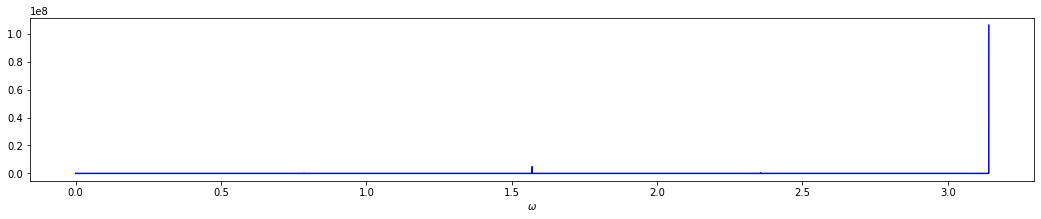

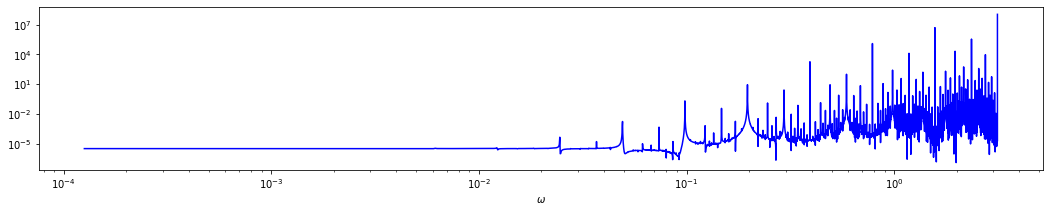

In [125]:
t_delta = 1
Omega_Max = 3.1415926/t_delta

xf= np.fft.rfft(A)

Omega = np.linspace(0, Omega_Max, len(A)/2+1)
xfp = np.abs(xf**2)

plt.figure(figsize=(18,3))
#plt.xlim([0,2])
#plt.ylim([-42,2])
plt.plot(Omega[1:], xfp[1:],"b-")
plt.xlabel(r'$ω$');

plt.figure(figsize=(18,3))
#plt.xlim([0,2])
#plt.ylim([-42,2])
plt.loglog(Omega[1:], xfp[1:],"b-")
plt.xlabel(r'$ω$');

## Lorenz 系统

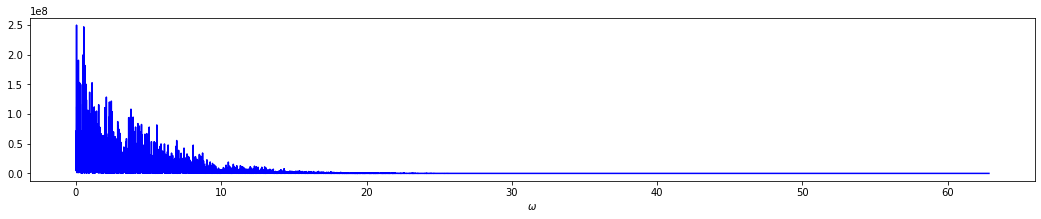

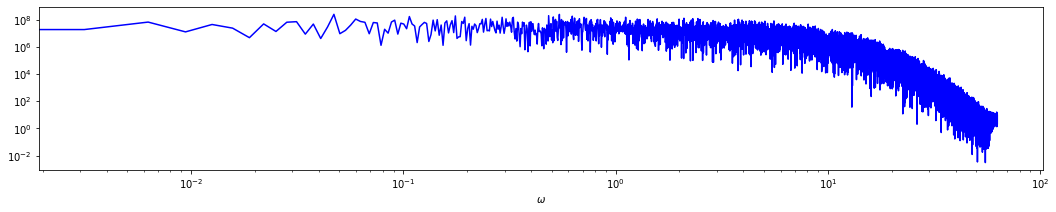

In [126]:
def Lorentz_equation(x,t,sigma,r,b):
    return np.array([sigma*(x[1]-x[0]),r*x[0]-x[1]-x[0]*x[2],x[0]*x[1]-b*x[2]])
    
X0=np.array([1,1,0]) # 初始条件
sigma = 10    # 固定 sigma 和 b
b = 8/3
# r =151 # limit circle
# r = 250 # another limit circle
# r= 25
r=29 #变化 r

t = np.arange(0,2000,0.05)
#t = np.linspace(0, 3, 1000) 

x_t = odeint(Lorentz_equation, X0, t, args=(sigma,r,b))

A = x_t[:,0]

# A = x_t[:,1]
# A  = x_t[:,2]

t_delta = 0.05
Omega_Max = 3.1415926/t_delta

xf= np.fft.rfft(A)

Omega = np.linspace(0, Omega_Max, len(A)/2+1)
xfp = np.abs(xf**2)


plt.figure(figsize=(18,3))
#plt.xlim([0,2])
#plt.ylim([-42,2])

plt.plot(Omega, xfp,"b-")
plt.xlabel(r'$ω$');

plt.figure(figsize=(18,3))
#plt.xlim([0,2])
#plt.ylim([-42,2])

plt.loglog(Omega, xfp,"b-")
plt.xlabel(r'$ω$');